In [77]:
import numpy as np
import pandas as pd

In [78]:
data = pd.read_csv("datasets_56485_108594_Breast_cancer_data.csv")
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [80]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

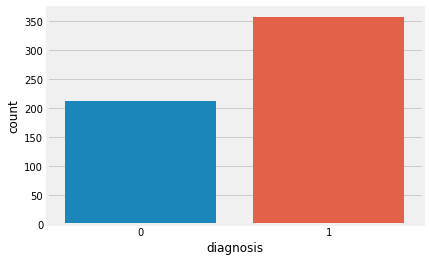

In [82]:
sns.countplot(data['diagnosis'])

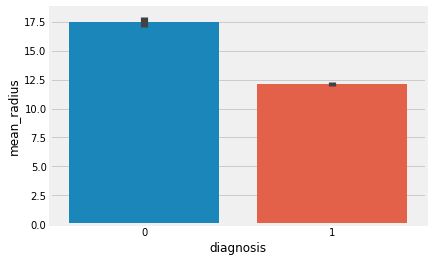

In [83]:
sns.barplot(x=data['diagnosis'], y=data['mean_radius'], data=data)

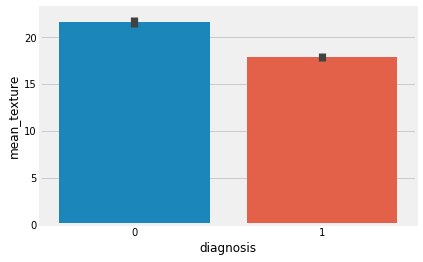

In [84]:
sns.barplot(x=data['diagnosis'], y=data['mean_texture'], data=data)

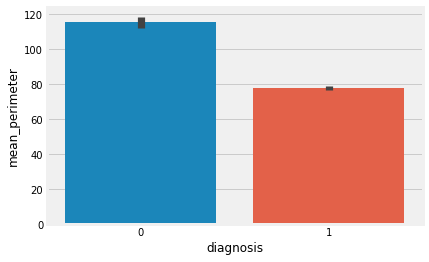

In [85]:
sns.barplot(x=data['diagnosis'], y=data['mean_perimeter'], data=data)

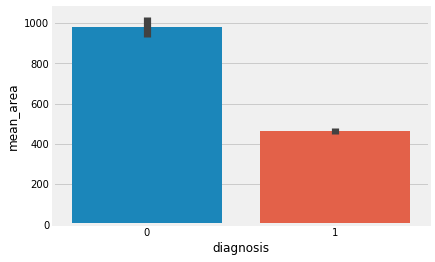

In [86]:
sns.barplot(x=data['diagnosis'], y=data['mean_area'], data=data)

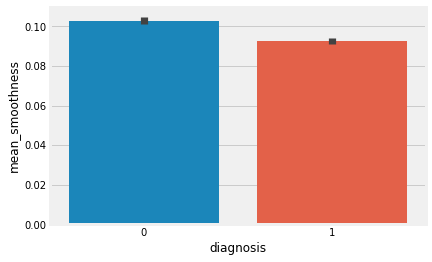

In [87]:
sns.barplot(x=data['diagnosis'], y=data['mean_smoothness'], data=data)

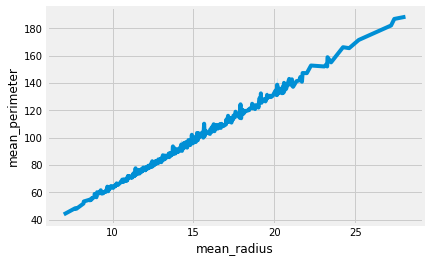

In [88]:
sns.lineplot(x=data['mean_radius'], y=data['mean_perimeter'], data=data)

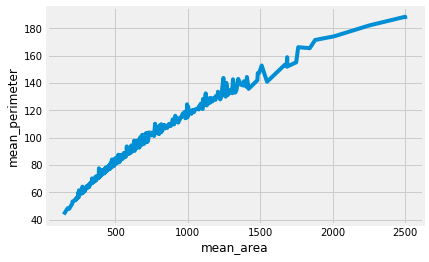

In [89]:
sns.lineplot(x=data['mean_area'], y=data['mean_perimeter'], data=data)

In [90]:
y = data['diagnosis']
x = data.drop(['diagnosis'], axis=1)

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.2)

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
list_models=[]
list_scores=[]
x_train=sc.fit_transform(x_train)
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
pred_1=lr.predict(sc.transform(x_test))
score_1=accuracy_score(y_test,pred_1)
list_scores.append(score_1)
list_models.append('LogisticRegression')


C:\Users\khandelwal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [93]:
score_1

0.9210526315789473

In [94]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds=knn.predict(sc.transform(x_test))
    scores=accuracy_score(y_test,preds)
    list_1.append(scores)
    

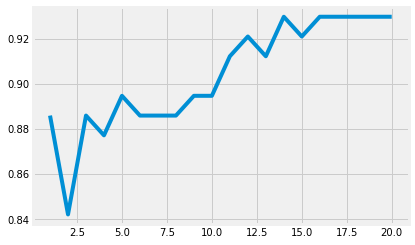

In [95]:
sns.lineplot(x=list(range(1,21)),y=list_1)
    

In [96]:
list_scores.append(max(list_1))
list_models.append('KNeighbors Classifier')


In [97]:
print(max(list_1))

0.9298245614035088


In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(sc.transform(x_test))
score_2=accuracy_score(y_test,pred_2)
list_models.append('Randomforest Classifier')
list_scores.append(score_2)

C:\Users\khandelwal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [99]:
score_2

0.9122807017543859

In [100]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_3=svm.predict(sc.transform(x_test))
score_3=accuracy_score(y_test,pred_3)
list_scores.append(score_3)
list_models.append('Support vector machines')

In [101]:
score_3

0.8947368421052632

In [104]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred_4=xgb.predict(sc.transform(x_test))
score_4=accuracy_score(y_test,pred_4)
list_models.append('XGboost')
list_scores.append(score_4)

In [105]:
score_4

0.9298245614035088

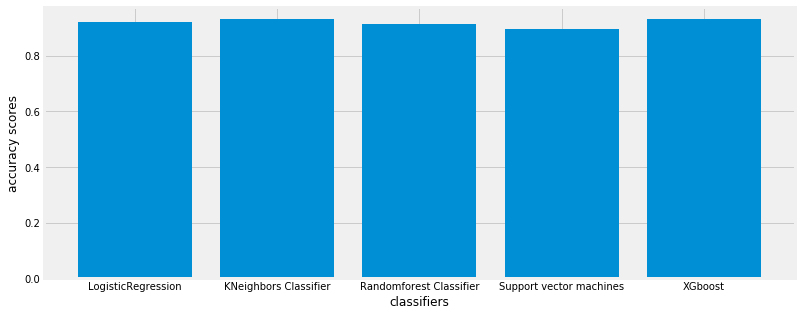

In [106]:
plt.figure(figsize=(12,5))
plt.bar(list_models,list_scores)
plt.xlabel('classifiers')
plt.ylabel('accuracy scores')
plt.show()